# Dataset and Domain


- Data Dictionary
- Variable categorization (count of numeric and categorical)
- Pre Processing Data Analysis (count of missing/ null values, redundant columns, etc.)
- Alternate sources of data that can supplement the core dataset (at least 2-3 columns)
- Project Justification - Project Statement, Complexity involved, Project Outcome –Commercial, Academic or Social value

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv(r'C:\Users\hp\Downloads\archive (52)\diabetes_prediction_dataset.csv')

In [55]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [57]:
df_num = df[['age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

df_cat = df[['gender','smoking_history']]

In [58]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [59]:
df.select_dtypes(include='object').describe()

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [60]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())
    print('-------------------------')

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
-------------------------
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
-------------------------


In [61]:
df.isnull().sum()  # there is no null values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [62]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [63]:
df[df.duplicated(keep='first')]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [64]:
df.drop_duplicates(keep='first',inplace=True)

In [65]:
df[df.duplicated()]  # we drop all duplicated values...

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


In [66]:
df.shape

(96146, 9)

- problem statement:-

- The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# Data Exploration (EDA)


- Relationship between variables

- Check for:-
    
o multi-collinearity

o distribution of variables

o presence of outliers and its treatment

o statistical significance of variables

o class imbalance and its treatment

<Axes: >

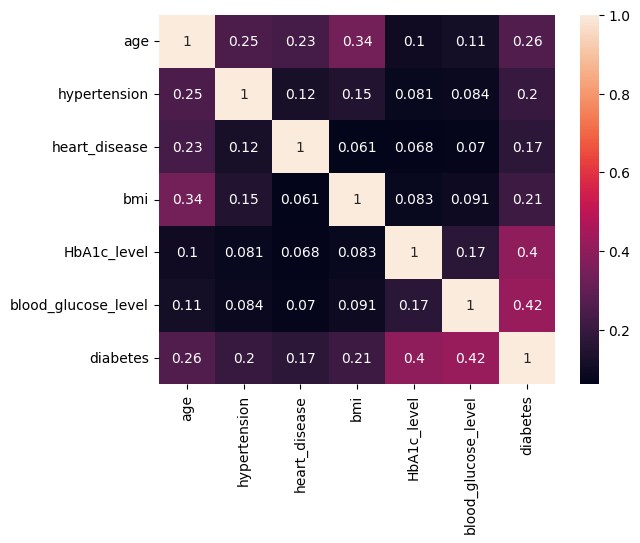

In [67]:
sns.heatmap(df_num.corr(),annot=True)

# There is no multicolinearity in numerical so no need to drop them...

In [68]:
df_num.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [69]:
df_cat.columns

Index(['gender', 'smoking_history'], dtype='object')

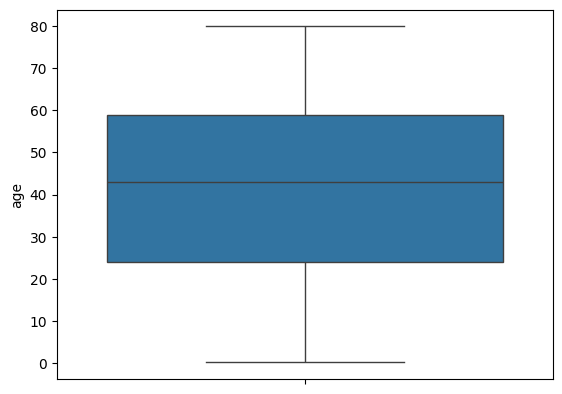

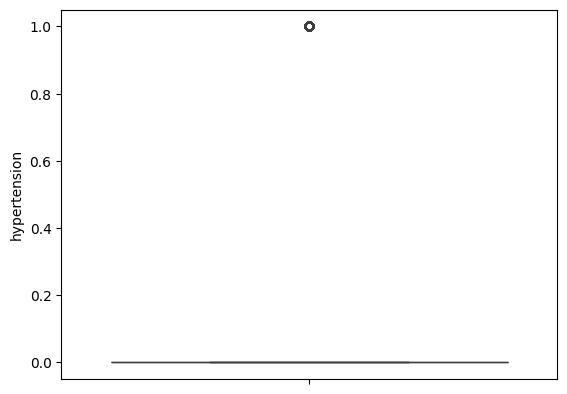

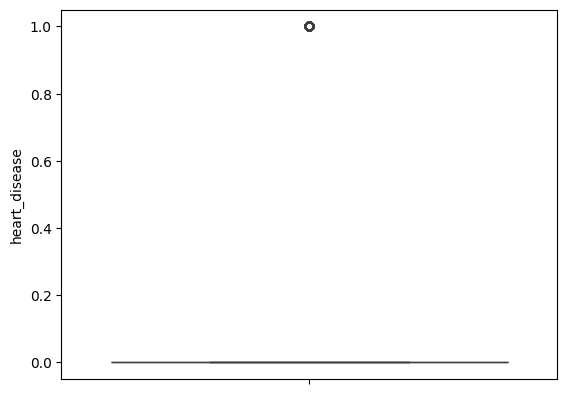

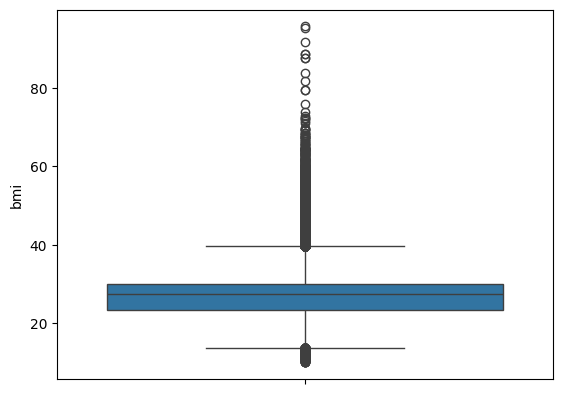

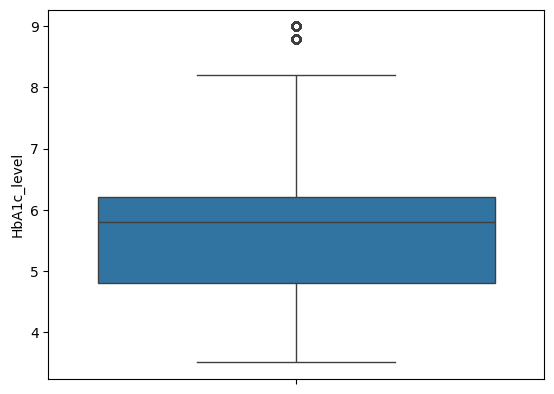

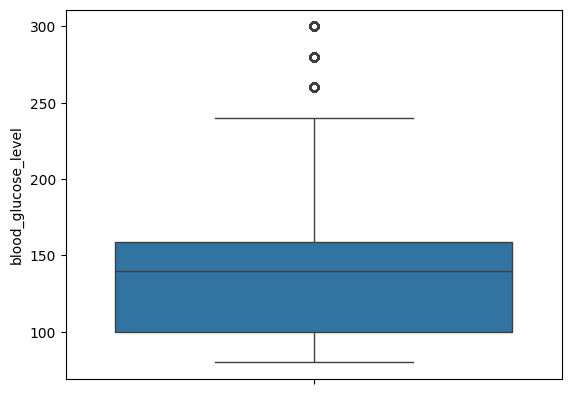

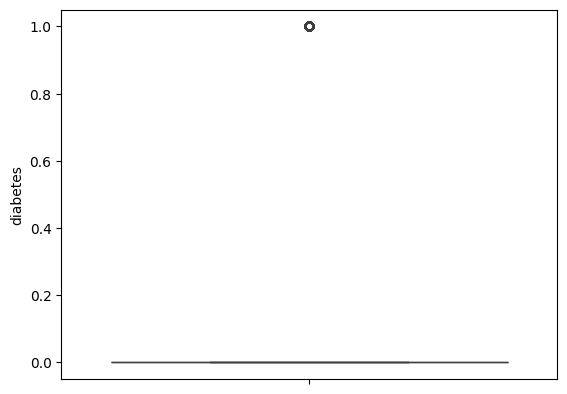

In [70]:
# check for outliers 

for i in df_num:
    sns.boxplot(df[i])
    plt.show()

In [71]:
# outlier treatment 

q1 = df_num.quantile(0.25)

q3 = df_num.quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5*iqr

ul = q3 + 1.5*iqr

df= df[((df_num < ll)| (df_num > ul)).any(axis=1)]

C:\Users\hp\AppData\Local\Temp\ipykernel_14776\4071402709.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df= df[((df_num < ll)| (df_num > ul)).any(axis=1)]


In [72]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
11,Female,54.0,0,0,former,54.70,6.0,100,0
23,Female,72.0,0,1,former,27.94,6.5,130,0
...,...,...,...,...,...,...,...,...,...
99962,Female,58.0,1,0,never,38.31,7.0,200,1
99963,Female,51.0,1,0,No Info,28.67,6.1,145,0
99979,Female,61.0,0,0,current,30.11,6.2,240,1
99984,Male,80.0,1,0,No Info,20.96,6.6,85,0


In [73]:
df1 = df.copy()

In [74]:
# class imbalance of target variable 

df_target = df['diabetes'].value_counts(normalize=True)

df_target

diabetes
0    0.594493
1    0.405507
Name: proportion, dtype: float64

In [75]:
df = pd.get_dummies(data=df,columns=['gender','smoking_history'],dtype='int',drop_first=True)


In [76]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
6,44.0,0,0,19.31,6.5,200,1,0,0,0,0,0,1,0
11,54.0,0,0,54.70,6.0,100,0,0,0,0,0,1,0,0
23,72.0,0,1,27.94,6.5,130,0,0,0,0,0,1,0,0


## smote analysis

In [77]:
# we need to balance the target variable

!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [78]:
from imblearn.over_sampling import SMOTE

x = df.drop('diabetes',axis=1)
y = df['diabetes']
sm = SMOTE()
x_res,y_res = sm.fit_resample(x,y)

In [79]:
y_res.value_counts(normalize=True) 

diabetes
0    0.5
1    0.5
Name: proportion, dtype: float64

In [80]:
df['diabetes'].value_counts() # its acceptable 60:40 

diabetes
0    12435
1     8482
Name: count, dtype: int64

# Visualization

In [81]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='heart_disease'>

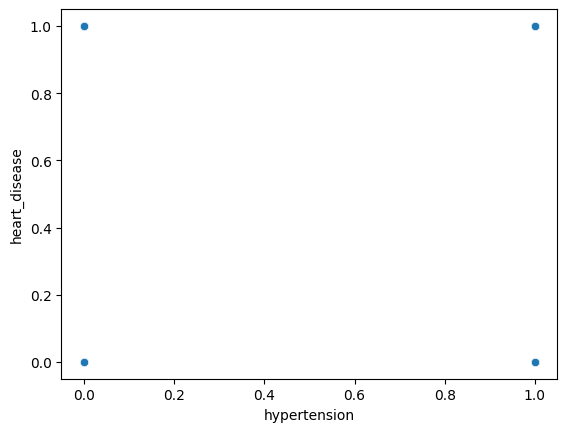

In [82]:
sns.scatterplot(data=df1,x='hypertension',y='heart_disease')

<Axes: xlabel='diabetes'>

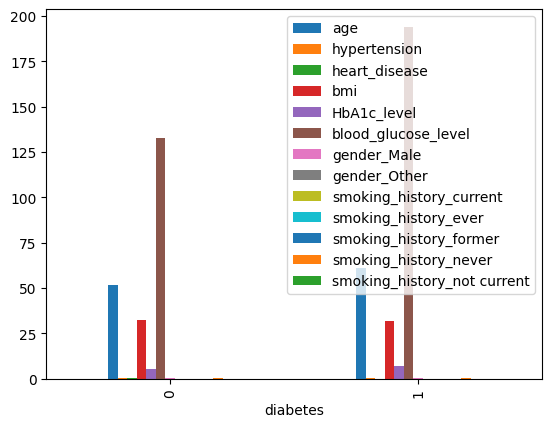

In [83]:
df.groupby('diabetes').mean().plot(kind='bar')

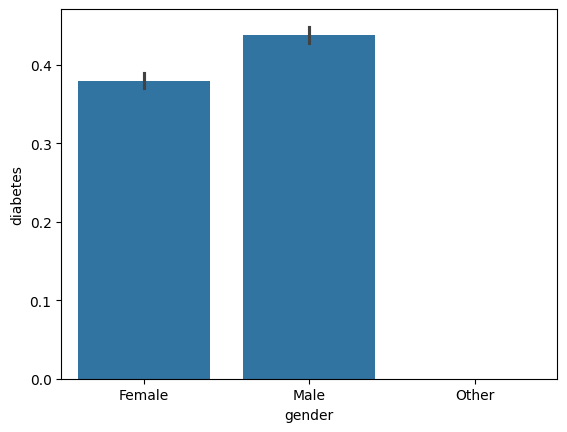

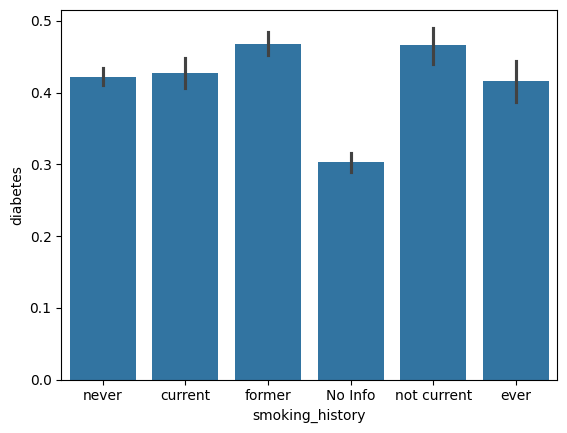

In [84]:
for i in df_cat:
    sns.barplot(data=df1,x=i,y='diabetes')
    plt.show()

# Feature Engineering


- Whether any transformations required
- Scaling the data
- Feature selection
- Dimensionality reduction

In [85]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [86]:
df.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
gender_Male                      int32
gender_Other                     int32
smoking_history_current          int32
smoking_history_ever             int32
smoking_history_former           int32
smoking_history_never            int32
smoking_history_not current      int32
dtype: object

In [88]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [91]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,0,1,0,0,0,0
6,44.0,0,0,19.31,6.5,200,1,0,0,0,0,0,1,0
11,54.0,0,0,54.70,6.0,100,0,0,0,0,0,1,0,0
23,72.0,0,1,27.94,6.5,130,0,0,0,0,0,1,0,0


In [92]:
df_scale= df[['age', 'bmi', 'HbA1c_level',
       'blood_glucose_level']]

In [93]:
# scaling

for i in df_scale:
    df[i] = std.fit_transform(df[[i]])

In [94]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.249191,0,1,-0.763236,0.460198,-0.323538,0,0,0,0,0,0,1,0
4,1.046804,1,1,-1.299572,-0.959886,-0.049288,0,1,0,1,0,0,0,0
6,-0.572291,0,0,-1.387722,0.381304,0.773461,1,0,0,0,0,0,1,0
11,-0.066324,0,0,2.370878,-0.013163,-1.054871,0,0,0,0,0,1,0,0
23,0.844417,0,1,-0.471172,0.381304,-0.506371,0,0,0,0,0,1,0,0


# Model Building

In [95]:
from sklearn.model_selection import train_test_split

x = df.drop('diabetes',axis=1)
y = df['diabetes']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR_model = LR.fit(xtrain,ytrain)
train_pred = LR_model.predict(xtrain)
test_pred = LR_model.predict(xtest)

from sklearn.metrics import classification_report

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))


              precision    recall  f1-score   support

           0       0.88      0.91      0.89      8647
           1       0.86      0.81      0.84      5994

    accuracy                           0.87     14641
   macro avg       0.87      0.86      0.87     14641
weighted avg       0.87      0.87      0.87     14641

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3788
           1       0.86      0.80      0.83      2488

    accuracy                           0.87      6276
   macro avg       0.87      0.86      0.86      6276
weighted avg       0.87      0.87      0.87      6276



In [105]:
from sklearn.ensemble import RandomForestClassifier

RD = RandomForestClassifier()
RD_model = RD.fit(xtrain,ytrain)
train_pred = RD_model.predict(xtrain)
test_pred = RD_model.predict(xtest)

from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8647
           1       1.00      1.00      1.00      5994

    accuracy                           1.00     14641
   macro avg       1.00      1.00      1.00     14641
weighted avg       1.00      1.00      1.00     14641

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3788
           1       0.97      0.86      0.91      2488

    accuracy                           0.93      6276
   macro avg       0.94      0.92      0.93      6276
weighted avg       0.94      0.93      0.93      6276



In [102]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN = KNN.fit(xtrain,ytrain)
train_pred = KNN.predict(xtrain)
test_pred = KNN.predict(xtest)

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8647
           1       0.96      0.87      0.92      5994

    accuracy                           0.93     14641
   macro avg       0.94      0.93      0.93     14641
weighted avg       0.94      0.93      0.93     14641

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3788
           1       0.93      0.83      0.88      2488

    accuracy                           0.91      6276
   macro avg       0.91      0.90      0.90      6276
weighted avg       0.91      0.91      0.91      6276



## GSCV

In [106]:
# GSCV 

from sklearn.model_selection import GridSearchCV

grid = {'n_estimators':[50,70,120,150,60,200,220,80],
       'min_samples_leaf':[2,3,4,5,6,7],
       'min_samples_split':[2,3,4,5,6,7]}

GSCV = GridSearchCV(estimator=RD,param_grid=grid,scoring=roc_auc_score,n_jobs=-1)

GSCV_model = GSCV.fit(xtrain,ytrain)

print('tuned_hyperparameters:',GSCV_model.best_params_)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan n

tuned_hyperparameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [107]:
## tuned_model

RD = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)
RD_model = RD.fit(xtrain,ytrain)
train_pred = RD_model.predict(xtrain)
test_pred = RD_model.predict(xtest)

from sklearn.metrics import classification_report,roc_auc_score

print(classification_report(ytrain,train_pred))
print(classification_report(ytest,test_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8647
           1       1.00      0.94      0.97      5994

    accuracy                           0.97     14641
   macro avg       0.98      0.97      0.97     14641
weighted avg       0.97      0.97      0.97     14641

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3788
           1       0.98      0.85      0.91      2488

    accuracy                           0.94      6276
   macro avg       0.95      0.92      0.93      6276
weighted avg       0.94      0.94      0.94      6276



Achieving 87% Accuracy for Diabetes Prediction:

-Utilized [LogisticRegression,ensemble_techniques] to forecast diabetes with 87% accuracy.
- Addressed data challenges such as handling null values and outliers to improve model robustness.

Improving to 94% Accuracy with Hyperparameters:

- Enhanced prediction accuracy to 94% by fine-tuning model hyperparameters.
- Conducted rigorous analysis, including addressing data outliers and handling missing values, to optimize model performance.